In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Census_dataset.csv')
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info

<bound method DataFrame.info of        age          workclass    education  education_num  \
0       39          State-gov    Bachelors             13   
1       50   Self-emp-not-inc    Bachelors             13   
2       38            Private      HS-grad              9   
3       53            Private         11th              7   
4       28            Private    Bachelors             13   
...    ...                ...          ...            ...   
32556   27            Private   Assoc-acdm             12   
32557   40            Private      HS-grad              9   
32558   58            Private      HS-grad              9   
32559   22            Private      HS-grad              9   
32560   52       Self-emp-inc      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2            

In [4]:
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [5]:
df.shape

(32561, 14)

In [6]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [7]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

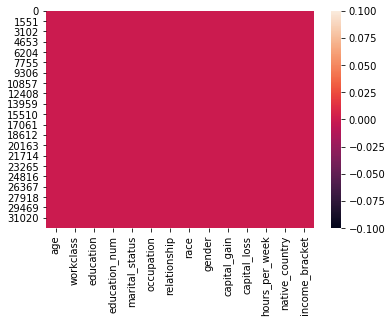

In [10]:
sns.heatmap(df.isnull())

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education_num,0.036527,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,0.148123,0.078409,0.054256,1.000000


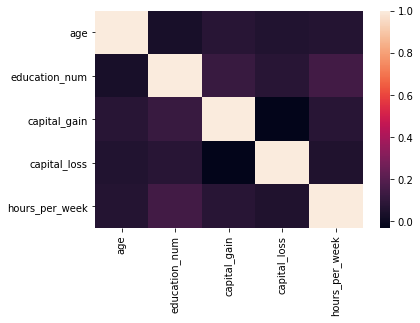

In [12]:
sns.heatmap(df.corr())

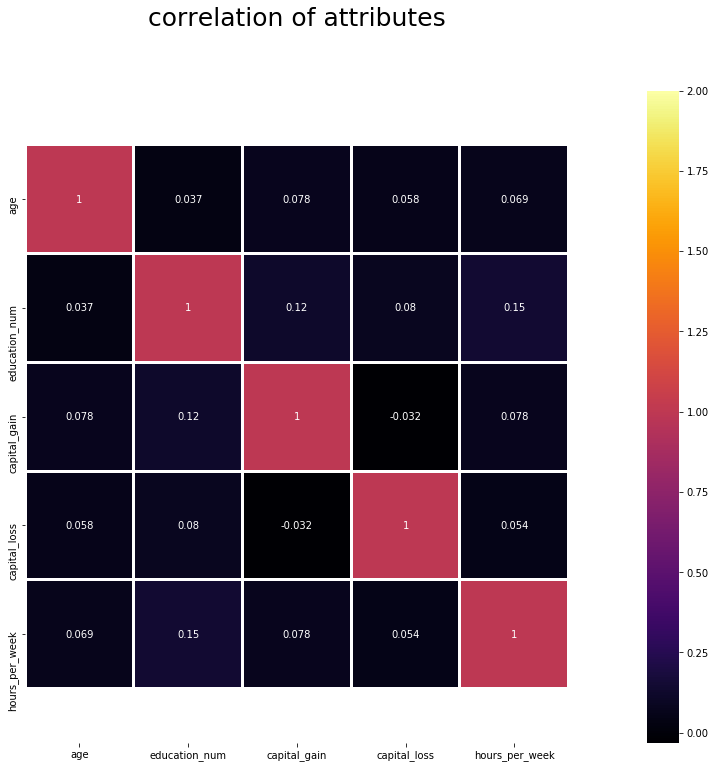

In [26]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

In [27]:
df.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [36]:
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['gender']=le.fit_transform(df['gender'])
df['native_country']=le.fit_transform(df['native_country'])
df['income_bracket']=le.fit_transform(df['income_bracket'])

In [37]:
df.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0


In [44]:
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
Above_income = df[(df['income_bracket'] != 0)]
Below_income = df[(df['income_bracket'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(Above_income), len(Below_income)), y = ['Above_income', 'Below_income'], orientation = 'h', opacity = 0.8,marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of income_bracket variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Below_income', 'Above_income'], values = df['income_bracket'].value_counts(), 
               textfont=dict(size=15),opacity = 0.8, 
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of income_bracket variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

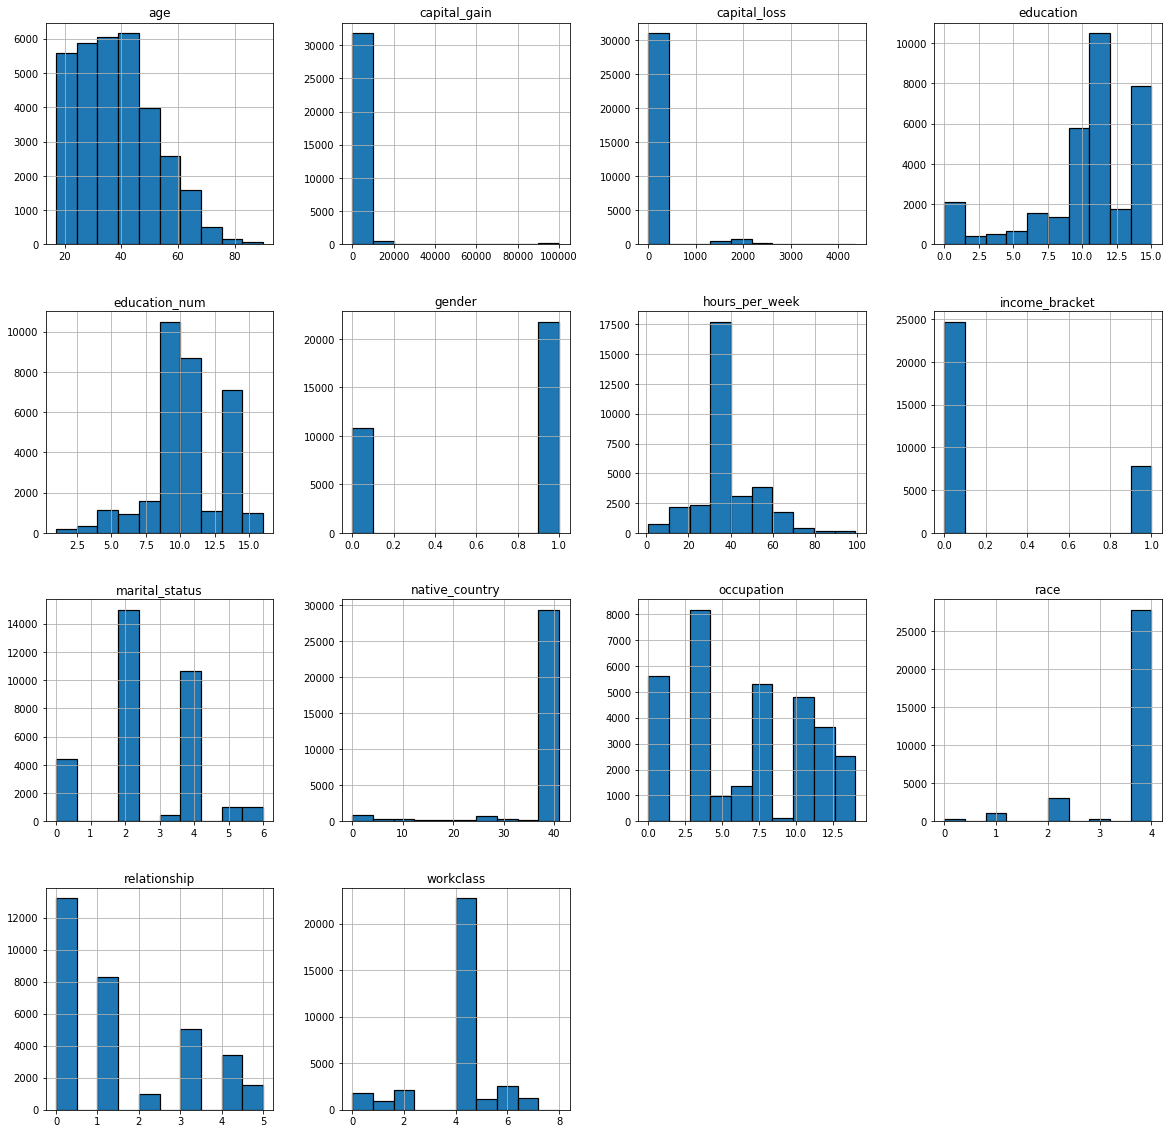

In [45]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

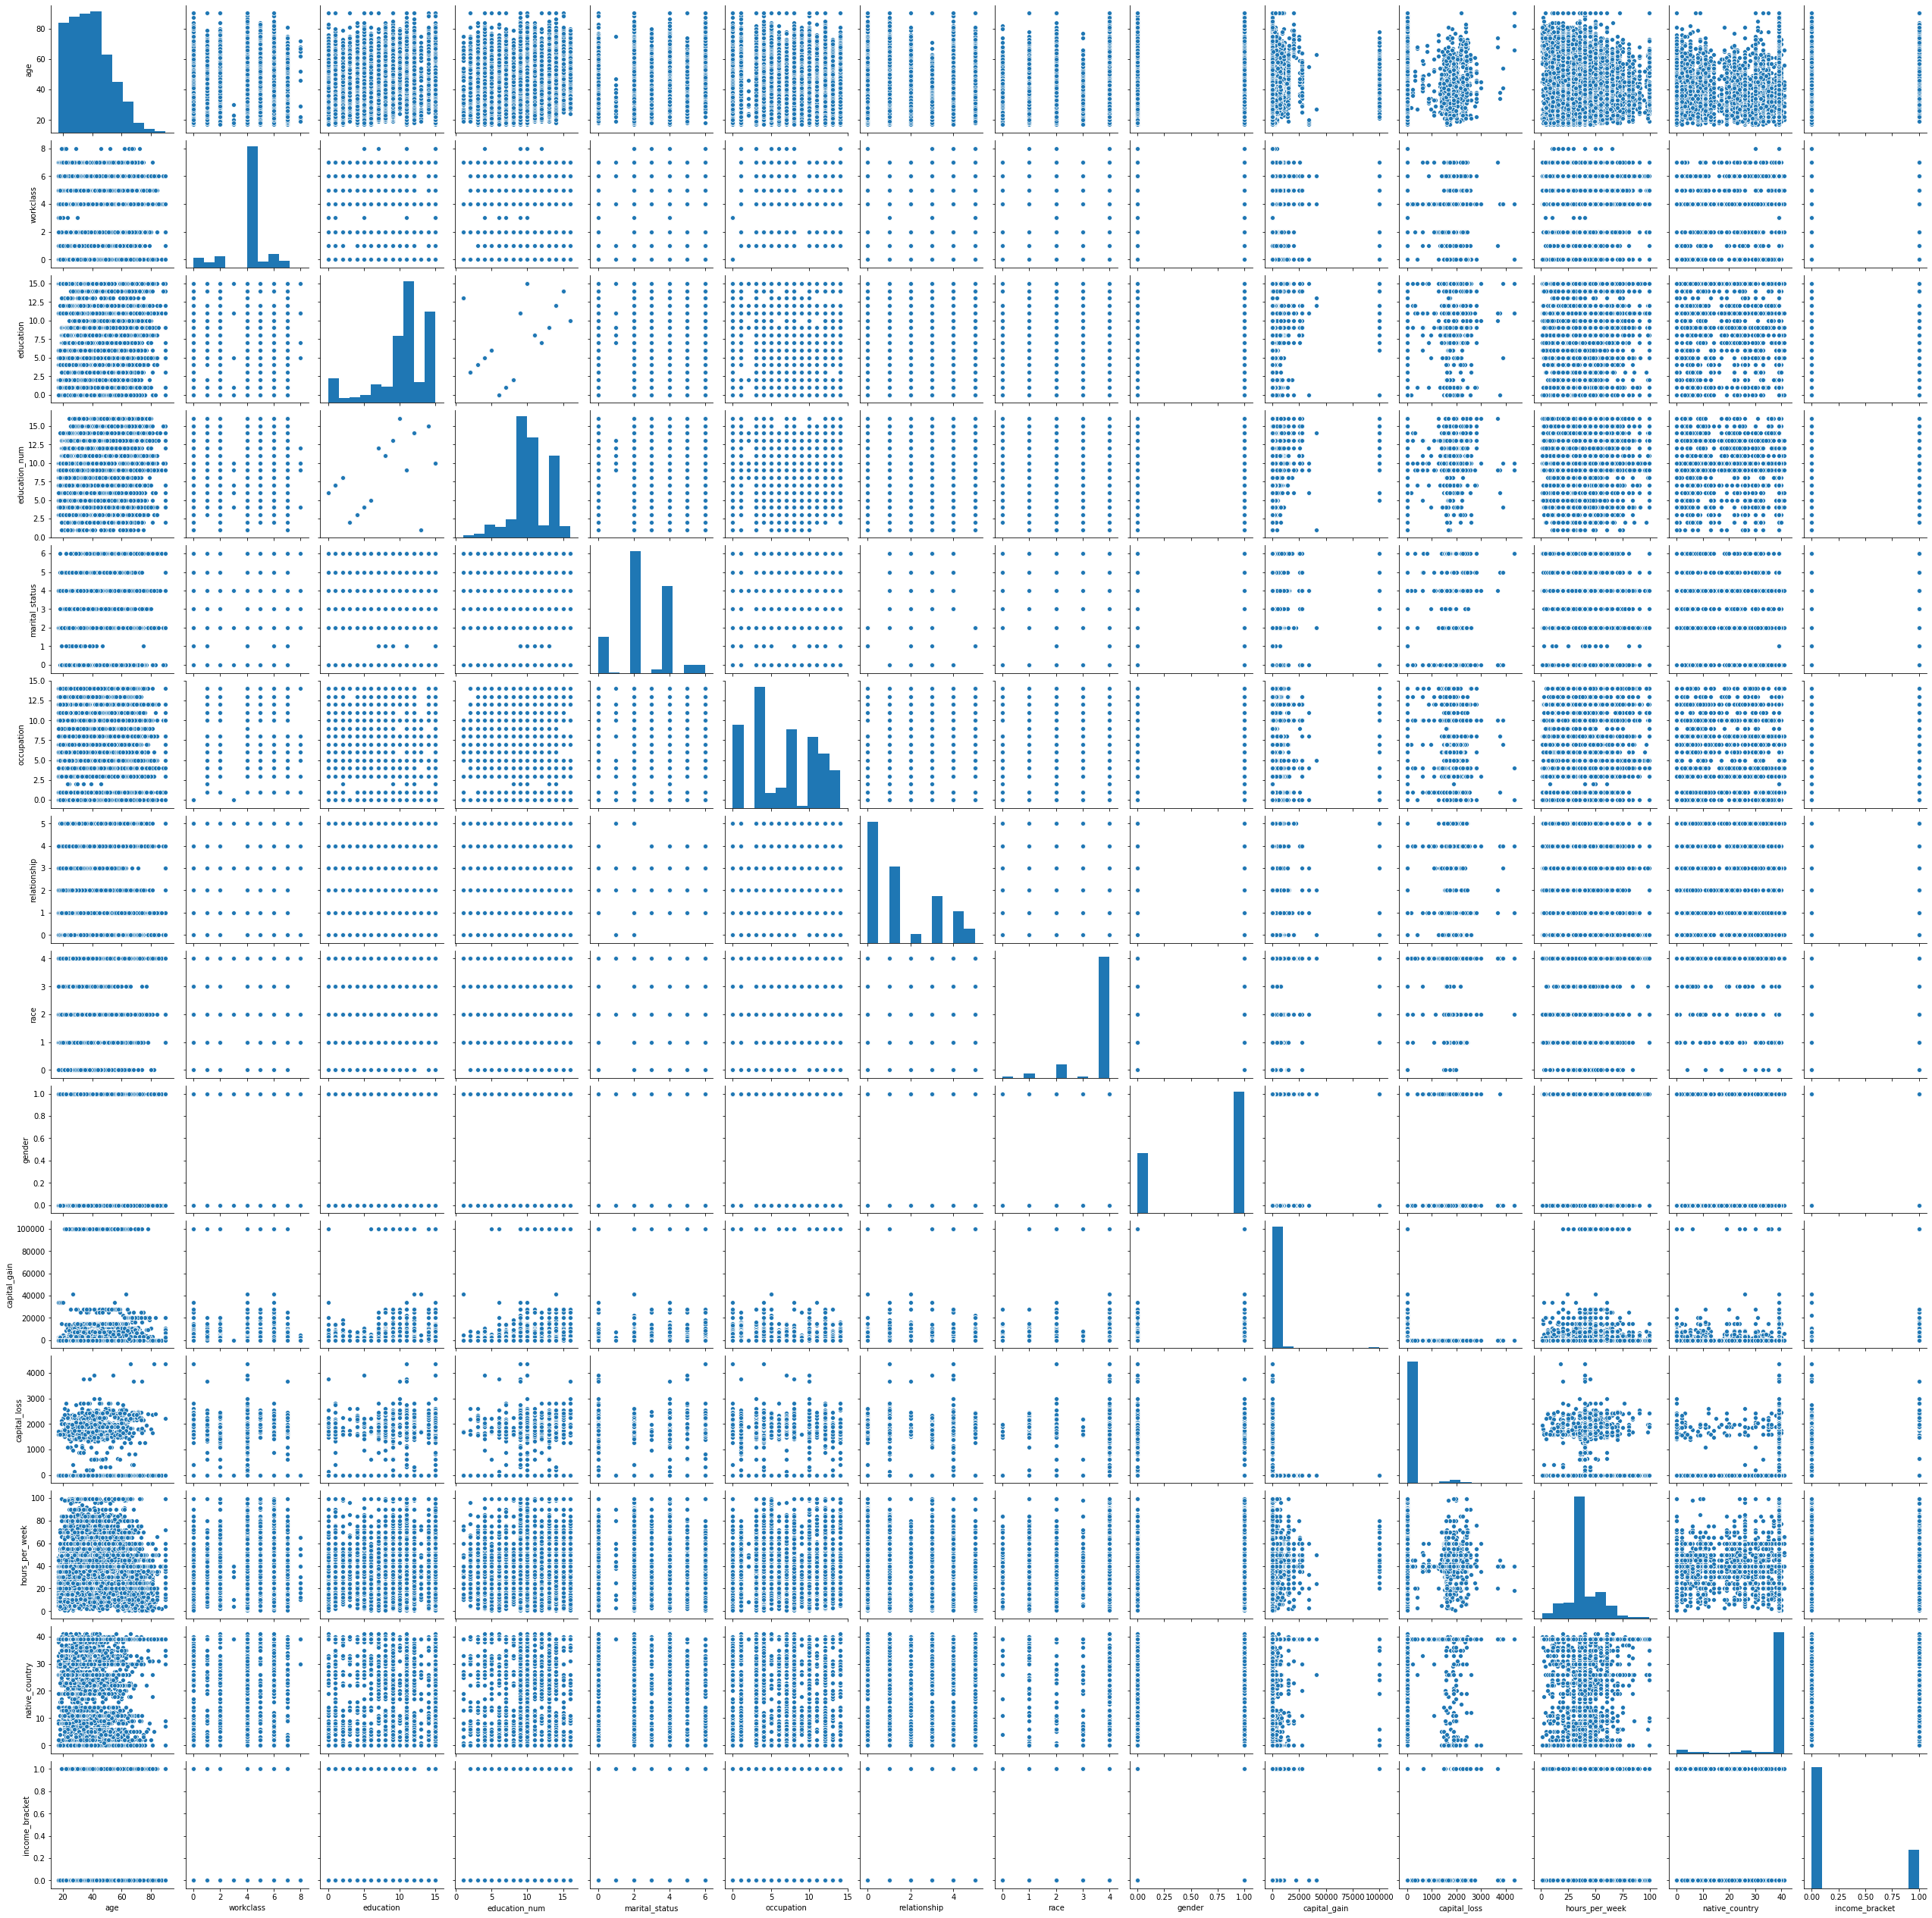

In [46]:
# Lets the check the Multi variant analysis of the Numerical Variables
import seaborn as sns
sns.pairplot(df)
plt.show()

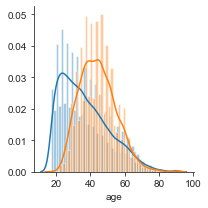

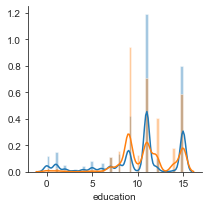

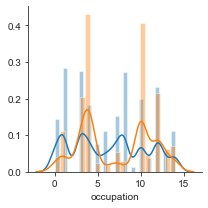

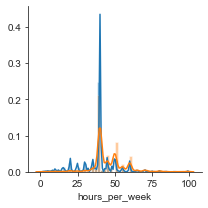

In [81]:
#  Checking the relationship between Target(income_bracket) and each of the independent variables.
g=sns.FacetGrid(df, hue='income_bracket')
g=(g.map(sns.distplot,"age",kde=20,hist=True ,label=True))

g=sns.FacetGrid(df, hue='income_bracket')
g=(g.map(sns.distplot,"education",hist=True ,label=True))

g=sns.FacetGrid(df, hue='income_bracket')
g=(g.map(sns.distplot,"occupation",hist=True ,label=True))

g=sns.FacetGrid(df, hue='income_bracket')
g=(g.map(sns.distplot,"hours_per_week",kde=20,hist=True ,label=True))

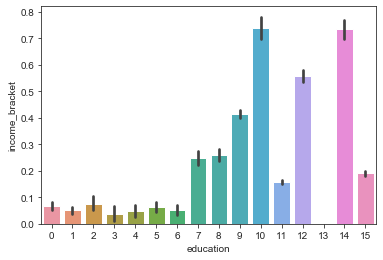

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='education',y="income_bracket",data=df)

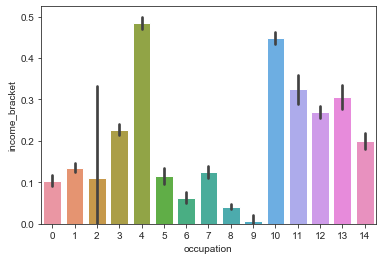

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='occupation',y="income_bracket",data=df)

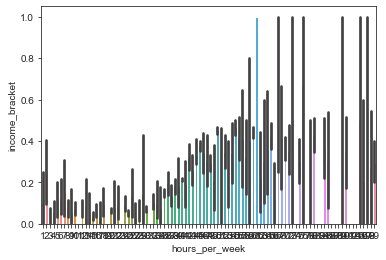

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='hours_per_week',y="income_bracket",data=df)

In [97]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Income_employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = Below_income[var_select].value_counts().values.tolist(),
                    labels  = Below_income[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Below income employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes income ",
                            annotations = [dict(text = "Above_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Below_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [106]:
plot_pie("gender")
plot_pie('workclass')
plot_pie('education')
plot_pie('occupation')
plot_pie('relationship') 
plot_pie('education_num')
plot_pie('hours_per_week')
plot_pie('native_country')
plot_pie('capital_loss')
plot_pie('capital_gain')

In [137]:
# Lets check for Outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(32561, 14)
(27722, 14)


In [138]:
# Sepearting target and input variables
import numpy as np
x=df_final.drop(columns=['income_bracket'])
y=df_final[["income_bracket"]]

In [139]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [140]:
#print the shape of the train and test data values

print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)

(22177, 13)
(22177, 1)
(5545, 13)
(5545, 1)


In [141]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.7862939585211902
[[4092  176]
 [1009  268]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4268
           1       0.60      0.21      0.31      1277

    accuracy                           0.79      5545
   macro avg       0.70      0.58      0.59      5545
weighted avg       0.76      0.79      0.74      5545



In [142]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.806311992786294
[[4257   11]
 [1063  214]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4268
           1       0.95      0.17      0.28      1277

    accuracy                           0.81      5545
   macro avg       0.88      0.58      0.59      5545
weighted avg       0.83      0.81      0.75      5545



In [143]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
predsvc=dtc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8135256988277728
[[3803  465]
 [ 569  708]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4268
           1       0.60      0.55      0.58      1277

    accuracy                           0.81      5545
   macro avg       0.74      0.72      0.73      5545
weighted avg       0.81      0.81      0.81      5545



In [144]:
svc=KNeighborsClassifier()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8256086564472498
[[3854  414]
 [ 553  724]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4268
           1       0.64      0.57      0.60      1277

    accuracy                           0.83      5545
   macro avg       0.76      0.73      0.74      5545
weighted avg       0.82      0.83      0.82      5545



In [145]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.806311992786294
[[4257   11]
 [1063  214]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4268
           1       0.95      0.17      0.28      1277

    accuracy                           0.81      5545
   macro avg       0.88      0.58      0.59      5545
weighted avg       0.83      0.81      0.75      5545



In [157]:
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    print(accuracy_score(test_y,predsvc))
    print(confusion_matrix(test_y,predsvc))
    print(classification_report(test_y,predsvc))

In [158]:
svmkernel('rbf')

0.806311992786294
[[4257   11]
 [1063  214]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4268
           1       0.95      0.17      0.28      1277

    accuracy                           0.81      5545
   macro avg       0.88      0.58      0.59      5545
weighted avg       0.83      0.81      0.75      5545



In [159]:
svmkernel('poly')

0.806311992786294
[[4257   11]
 [1063  214]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      4268
           1       0.95      0.17      0.28      1277

    accuracy                           0.81      5545
   macro avg       0.88      0.58      0.59      5545
weighted avg       0.83      0.81      0.75      5545



In [160]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_predicition.csv')

In [150]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79242561 0.78665464 0.79671717 0.78517316 0.79671717]
0.7915375512174431
0.004874296688591365


In [151]:
sv=SVC()
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79242561 0.78665464 0.79671717 0.78517316 0.79671717]
0.7915375512174431
0.004874296688591365


Hyper Parameter -Cross validation_grindsearchcv

In [152]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [153]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [154]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [155]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.8149684400360685
[[3809  459]
 [ 567  710]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4268
           1       0.61      0.56      0.58      1277

    accuracy                           0.81      5545
   macro avg       0.74      0.72      0.73      5545
weighted avg       0.81      0.81      0.81      5545



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_i

In [156]:
import pickle
filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
# Load the model from the disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([0, 0, 0, ..., 0, 0, 0])